In [21]:
import pandas as pd
pyramid = pd.read_excel(r'C:\Users\rikushwa\github\Data-Analysis-with-Python\pyramid.xlsx', sheet_name='pyramid')
pyramid.head()

,dept,dept_n,div_n,Pyramid
0,-1,UNKNOWN,UNKNOWN,UNKNOWN
1,0,UNKNOWN,NON RETAIL,NON RETAIL
2,0,NaN,NON RETAIL,NON RETAIL
3,1,TESTING,SPECIAL PROJECT,SPECIAL PROJECT
4,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME


In [22]:
pyramid.describe()

,dept
count,1010.000000
mean,499.818812
std,289.002669
min,-1.000000
25%,250.250000
50%,500.500000
75%,749.750000
max,999.000000


In [23]:
raw_data = pd.read_excel(r'C:\Users\rikushwa\github\Data-Analysis-with-Python\assess.xlsx', sheet_name='Raw_data')
raw_data.head()

,date,dc_id,dept,fcst_vol,actual_vol,Error
0,2021-10-15,553,2,9.0,20.0,1.222222
1,2021-10-14,553,2,163.0,98.0,-0.398773
2,2021-10-13,551,2,3.0,37.0,11.333333
3,2021-10-13,553,2,196.0,56.0,-0.714286
4,2021-10-15,578,7,1048.0,335.0,-0.680344


In [63]:
df = pyramid.merge(raw_data, on='dept')
df

,dept,dept_n,div_n,Pyramid,date,dc_id,fcst_vol,actual_vol,Error
0,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-15,553,9.0,20.0,1.222222
1,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-14,553,163.0,98.0,-0.398773
2,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-13,551,3.0,37.0,11.333333
3,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-13,553,196.0,56.0,-0.714286
4,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-13,554,21.0,17.0,-0.190476
...,...,...,...,...,...,...,...,...,...
449,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,554,79.0,0.0,-1.000000
450,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,555,310.0,694.0,1.238710
451,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,557,45.0,291.0,5.466667
452,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,559,121.0,67.0,-0.446281


In [65]:
df.to_excel(r'C:\Users\rikushwa\github\Data-Analysis-with-Python\op.xlsx', index=False)

In [71]:
date = pd.to_datetime(df['date'])
new_day = date.dt.day_name()
new_day.to_excel(r'C:\Users\rikushwa\github\Data-Analysis-with-Python\date.xlsx')

In [75]:
agg_data = pd.read_excel(r'C:\Users\rikushwa\github\Data-Analysis-with-Python\date.xlsx')
agg_data

,dept,Pyramid,date,dc_id,fcst_vol,actual_vol,Error,day
0,2,HOME,2021-10-15,553,9.0,20.0,1.222222,Friday
1,2,HOME,2021-10-14,553,163.0,98.0,-0.398773,Thursday
2,2,HOME,2021-10-13,551,3.0,37.0,11.333333,Wednesday
3,2,HOME,2021-10-13,553,196.0,56.0,-0.714286,Wednesday
4,2,HOME,2021-10-13,554,21.0,17.0,-0.190476,Wednesday
...,...,...,...,...,...,...,...,...
449,240,HOME,2021-10-17,554,79.0,0.0,-1.000000,Sunday
450,240,HOME,2021-10-17,555,310.0,694.0,1.238710,Sunday
451,240,HOME,2021-10-17,557,45.0,291.0,5.466667,Sunday
452,240,HOME,2021-10-17,559,121.0,67.0,-0.446281,Sunday


In [87]:
new_py = df[['Pyramid','fcst_vol','actual_vol']]
new_py

,Pyramid,fcst_vol,actual_vol
0,HOME,9.0,20.0
1,HOME,163.0,98.0
2,HOME,3.0,37.0
3,HOME,196.0,56.0
4,HOME,21.0,17.0
...,...,...,...
449,HOME,79.0,0.0
450,HOME,310.0,694.0
451,HOME,45.0,291.0
452,HOME,121.0,67.0


In [91]:
grouped_data = new_py.groupby("Pyramid")
maximum = grouped_data.max()
maximum = maximum.reset_index()
maximum


,Pyramid,fcst_vol,actual_vol
0,BEAUTY/COSMETICS,11561.0,6781.0
1,ESSENTIALS,6586.0,6764.0
2,FOOD/BEVERAGE,1656.0,336.0
3,HARDLINES,5964.0,6693.0
4,HOME,8969.0,11624.0
5,MENS/KIDS,2655.0,2762.0
6,NON RETAIL,5207.0,5353.0
7,WOMENS/ACCESS,4791.0,4232.0


In [96]:
df

,dept,dept_n,div_n,Pyramid,date,dc_id,fcst_vol,actual_vol,Error
0,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-15,553,9.0,20.0,1.222222
1,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-14,553,163.0,98.0,-0.398773
2,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-13,551,3.0,37.0,11.333333
3,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-13,553,196.0,56.0,-0.714286
4,2,STORAGE/ORGANIZATION,STORAGE/UTILITY,HOME,2021-10-13,554,21.0,17.0,-0.190476
...,...,...,...,...,...,...,...,...,...
449,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,554,79.0,0.0,-1.000000
450,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,555,310.0,694.0,1.238710
451,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,557,45.0,291.0,5.466667
452,240,SEASONAL,SEASNL/OUTDR LIVING,HOME,2021-10-17,559,121.0,67.0,-0.446281


In [102]:
new_dc = agg_data[['dc_id','fcst_vol','actual_vol']]
new_dc

,dc_id,fcst_vol,actual_vol
0,553,9.0,20.0
1,553,163.0,98.0
2,551,3.0,37.0
3,553,196.0,56.0
4,554,21.0,17.0
...,...,...,...
449,554,79.0,0.0
450,555,310.0,694.0
451,557,45.0,291.0
452,559,121.0,67.0


In [116]:
grouped_data = new_dc.groupby(["dc_id"])
maximum = grouped_data.max()
maximum = maximum.reset_index()
maximum.sort_values(['fcst_vol','actual_vol'],ascending=False)

,dc_id,fcst_vol,actual_vol
17,594,11561.0,6781.0
7,559,10309.0,6984.0
9,578,8969.0,6751.0
4,556,8547.0,6162.0
2,554,8198.0,6490.0
20,3803,7452.0,9004.0
24,3811,6809.0,11624.0
8,560,6466.0,5275.0
19,3802,6390.0,5626.0
21,3804,6199.0,5367.0


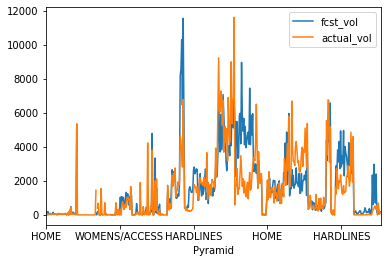

In [139]:
import matplotlib.pyplot as plt
axes = plt.gca()
new_py.plot(y='fcst_vol', x='Pyramid',ax=axes);
new_py.plot(y='actual_vol', x='Pyramid',ax=axes);

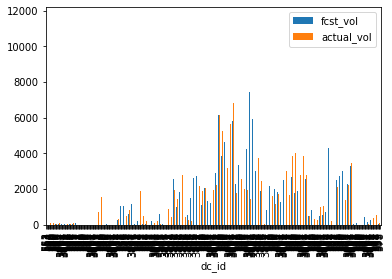

In [145]:
new_dc.plot.bar(x='dc_id')